In [1]:
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv("Files/titanic.csv")
df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [31]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace = True)

In [32]:
df

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [33]:
df['sex'] = pd.get_dummies(df['Sex'],drop_first=True)
df.drop('Sex',axis=1,inplace=True)

In [34]:
df

,Pclass,Age,Fare,Survived,sex
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
...,...,...,...,...,...
886,2,27.0,13.0000,0,1
887,1,19.0,30.0000,1,0
888,3,NaN,23.4500,0,0
889,1,26.0,30.0000,1,1


In [39]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# df['sex']=OneHotEncoder().fit_transform(df[['Sex']])


In [42]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

Pclass      0
Age         0
Fare        0
Survived    0
sex         0
dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('sex',axis=1),df['sex'],test_size=0.3)

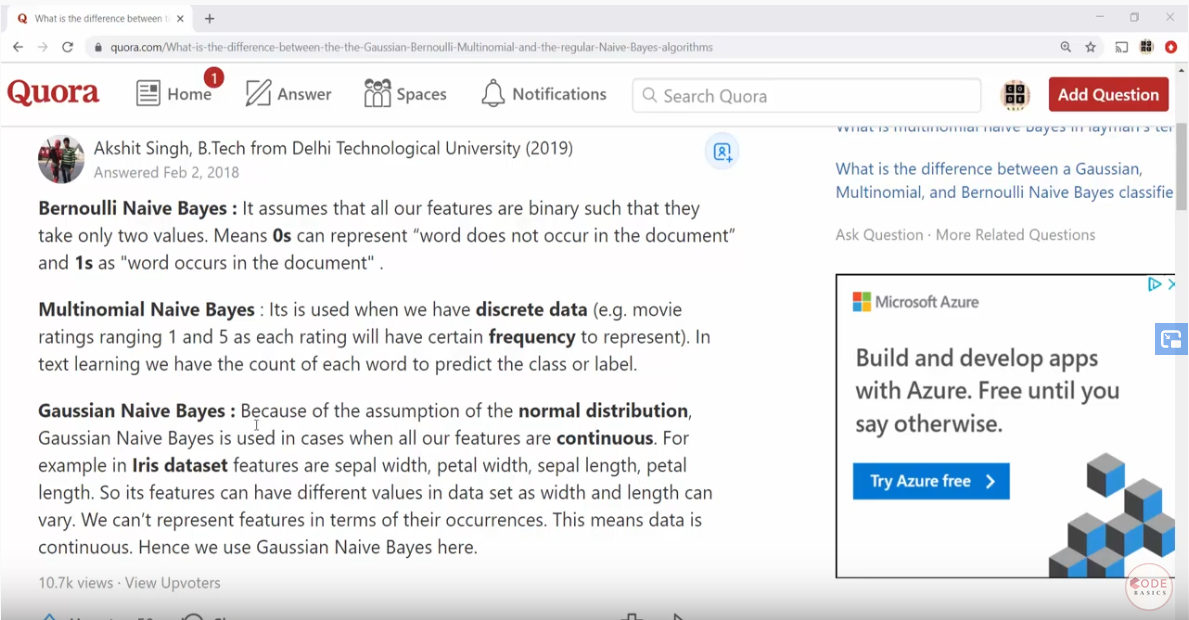

In [44]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [47]:
score = model.score(X_test,y_test)
score

0.7611940298507462

In [48]:
model.predict(X_test[:10])

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0], dtype=uint8)

In [49]:
model.predict_proba(X_test[:10])

array([[0.72659584, 0.27340416],
       [0.06844749, 0.93155251],
       [0.57761508, 0.42238492],
       [0.74993496, 0.25006504],
       [0.64653398, 0.35346602],
       [0.06189506, 0.93810494],
       [0.04904782, 0.95095218],
       [0.70705848, 0.29294152],
       [0.06112119, 0.93887881],
       [0.82671924, 0.17328076]])